In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('transactions_ordered.csv')

In [3]:
df.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [4]:
df.size

260000

transaction_id             20000

customer_id                 3494

product_id                   101

product_first_sold_date      100

df.size 260000


In [7]:
df['online_order'].value_counts()

True     9829
False    9811
Name: online_order, dtype: int64

In [8]:
df['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [9]:
df['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

online orders are 50/50 

product lines:

    - standard 14176
    - road 3970
    - touring 1234
    - mountain 423
    
brands: 

    - Solex             4253
    - Giant Bicycles    3312
    - WeareA2B          3295
    - OHM Cycles        3043
    - Trek Bicycles     2990
    - Norco Bicycles    2910
    
product class:

    - medium 13826
    - high 3013
    - low 2964
    
product size:

    - medium 12990
    - large 3976
    - small 2837

In [27]:
df['product_line'].value_counts().sum()

19803

In [28]:
df['product_size'].value_counts(normalize=True)

medium    0.655961
large     0.200778
small     0.143261
Name: product_size, dtype: float64

In [25]:
df['product_class'].value_counts(normalize=True)

medium    0.698177
high      0.152149
low       0.149674
Name: product_class, dtype: float64

In [24]:
df['product_line'].value_counts(normalize=True)

Standard    0.715851
Road        0.200475
Touring     0.062314
Mountain    0.021360
Name: product_line, dtype: float64

In [20]:
# 2% of sales is the mountain bike
# 71.59% of sales is standard bike

70% of bikes sold are of the medium product class

66% of bikes sold are of the medium product size

In [10]:
df['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [11]:
df['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [12]:
df['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [29]:
mults = []

for i in cusotmers:
    if (i >= 5):
        mults.append(i)

In [30]:
len(mults)

2383

2383 customers buy 5 or more products

In [31]:
mult = []

for i in cusotmers:
    if (i > 1):
        mult.append(i)

In [32]:
len(mult)

3445

In [33]:
20000 - 3445

16555

3445 customers bought more than 1 product

16555 customers boutght only 1 product

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.0+ MB


In [35]:
df.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [36]:
df["product_size"] = df["product_size"].astype("category").cat.codes

In [37]:
df["product_class"] = df["product_class"].astype("category").cat.codes

In [38]:
df["product_line"] = df["product_line"].astype("category").cat.codes

In [39]:
df["brand"] = df["brand"].astype("category").cat.codes

In [40]:
df["order_status"] = df["order_status"].astype("category").cat.codes

In [41]:
df["online_order"] = df["online_order"].astype("category").cat.codes

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             20000 non-null  int8   
 5   order_status             20000 non-null  int8   
 6   brand                    20000 non-null  int8   
 7   product_line             20000 non-null  int8   
 8   product_class            20000 non-null  int8   
 9   product_size             20000 non-null  int8   
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(2), int64(3), int8(6), object(2)
memory usage: 1.2+ MB


In [43]:
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,94,86,1,12/23/17,0,0,2,2,2,1,235.63,$125.07,38482.0
1,3765,38,1,4/6/17,1,0,3,2,2,1,1577.53,$826.51,39526.0
2,5157,47,1,5/11/17,1,0,4,1,1,2,1720.70,"$1,531.42",37823.0
3,9785,72,1,1/5/17,0,0,1,2,2,1,360.40,$270.30,37873.0
4,13424,2,1,2/21/17,0,0,3,2,2,1,71.49,$53.62,38573.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,14870,22,3500,1/11/17,0,0,5,2,2,1,60.34,$45.26,34165.0
19996,19836,40,3500,3/14/17,1,0,2,2,0,1,1458.17,$874.90,38750.0
19997,8708,0,5034,10/7/17,0,0,3,1,2,1,416.98,312.7350159,42218.0
19998,16701,0,5034,1/27/17,0,0,1,2,2,1,360.40,270.2999878,35667.0


In [44]:
trans_date = df['transaction_date']

In [45]:
noyear = []

for i in trans_date:
    noyear.append(i[0:-3])
    

In [46]:
noyear

['12/23',
 '4/6',
 '5/11',
 '1/5',
 '2/21',
 '5/19',
 '3/27',
 '12/14',
 '6/4',
 '12/9',
 '3/29',
 '5/4',
 '6/11',
 '8/24',
 '2/23',
 '9/16',
 '4/21',
 '4/5',
 '9/4',
 '3/24',
 '6/26',
 '9/19',
 '4/3',
 '6/18',
 '8/16',
 '3/3',
 '5/3',
 '12/14',
 '5/26',
 '4/28',
 '5/21',
 '9/16',
 '10/27',
 '1/28',
 '2/6',
 '4/21',
 '2/18',
 '2/24',
 '9/22',
 '12/8',
 '7/13',
 '4/11',
 '10/21',
 '1/4',
 '10/4',
 '4/21',
 '8/11',
 '1/28',
 '5/10',
 '3/6',
 '10/13',
 '2/4',
 '8/20',
 '9/30',
 '8/26',
 '6/20',
 '7/13',
 '8/9',
 '11/27',
 '11/17',
 '4/2',
 '10/30',
 '8/2',
 '7/9',
 '6/2',
 '11/14',
 '8/21',
 '9/4',
 '2/12',
 '7/23',
 '8/21',
 '10/24',
 '9/16',
 '2/16',
 '8/2',
 '11/17',
 '3/1',
 '12/3',
 '1/6',
 '4/5',
 '11/13',
 '8/16',
 '5/11',
 '10/27',
 '3/10',
 '7/30',
 '9/20',
 '6/7',
 '1/20',
 '11/25',
 '8/17',
 '5/10',
 '9/22',
 '2/12',
 '7/31',
 '3/14',
 '11/14',
 '5/1',
 '10/11',
 '12/30',
 '7/15',
 '5/11',
 '3/25',
 '5/16',
 '7/5',
 '6/24',
 '8/18',
 '1/31',
 '9/19',
 '3/25',
 '11/1',
 '11/29',

In [47]:
day = []
month = []

for i in noyear:
    if(i[-2] == '/'):
        month.append(i[0:-2])
        day.append(i[-1:])
    elif (i[-3] == '/'):
        month.append(i[0:-3])
        day.append(i[-2:])

In [48]:
day

['23',
 '6',
 '11',
 '5',
 '21',
 '19',
 '27',
 '14',
 '4',
 '9',
 '29',
 '4',
 '11',
 '24',
 '23',
 '16',
 '21',
 '5',
 '4',
 '24',
 '26',
 '19',
 '3',
 '18',
 '16',
 '3',
 '3',
 '14',
 '26',
 '28',
 '21',
 '16',
 '27',
 '28',
 '6',
 '21',
 '18',
 '24',
 '22',
 '8',
 '13',
 '11',
 '21',
 '4',
 '4',
 '21',
 '11',
 '28',
 '10',
 '6',
 '13',
 '4',
 '20',
 '30',
 '26',
 '20',
 '13',
 '9',
 '27',
 '17',
 '2',
 '30',
 '2',
 '9',
 '2',
 '14',
 '21',
 '4',
 '12',
 '23',
 '21',
 '24',
 '16',
 '16',
 '2',
 '17',
 '1',
 '3',
 '6',
 '5',
 '13',
 '16',
 '11',
 '27',
 '10',
 '30',
 '20',
 '7',
 '20',
 '25',
 '17',
 '10',
 '22',
 '12',
 '31',
 '14',
 '14',
 '1',
 '11',
 '30',
 '15',
 '11',
 '25',
 '16',
 '5',
 '24',
 '18',
 '31',
 '19',
 '25',
 '1',
 '29',
 '20',
 '11',
 '17',
 '22',
 '24',
 '12',
 '17',
 '21',
 '18',
 '16',
 '29',
 '19',
 '24',
 '10',
 '6',
 '20',
 '6',
 '2',
 '3',
 '9',
 '16',
 '27',
 '13',
 '11',
 '13',
 '12',
 '13',
 '25',
 '31',
 '5',
 '4',
 '23',
 '4',
 '15',
 '23',
 '17',
 '1

In [49]:
df['day']= day

In [50]:
df['month']= month

In [51]:
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,day,month
0,94,86,1,12/23/17,0,0,2,2,2,1,235.63,$125.07,38482.0,23,12
1,3765,38,1,4/6/17,1,0,3,2,2,1,1577.53,$826.51,39526.0,6,4
2,5157,47,1,5/11/17,1,0,4,1,1,2,1720.70,"$1,531.42",37823.0,11,5
3,9785,72,1,1/5/17,0,0,1,2,2,1,360.40,$270.30,37873.0,5,1
4,13424,2,1,2/21/17,0,0,3,2,2,1,71.49,$53.62,38573.0,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,14870,22,3500,1/11/17,0,0,5,2,2,1,60.34,$45.26,34165.0,11,1
19996,19836,40,3500,3/14/17,1,0,2,2,0,1,1458.17,$874.90,38750.0,14,3
19997,8708,0,5034,10/7/17,0,0,3,1,2,1,416.98,312.7350159,42218.0,7,10
19998,16701,0,5034,1/27/17,0,0,1,2,2,1,360.40,270.2999878,35667.0,27,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             20000 non-null  int8   
 5   order_status             20000 non-null  int8   
 6   brand                    20000 non-null  int8   
 7   product_line             20000 non-null  int8   
 8   product_class            20000 non-null  int8   
 9   product_size             20000 non-null  int8   
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
 13  day                      20000 non-null  object 
 14  month                 

In [53]:
df['day'] = df['day'].astype('int')

In [54]:
df['month'] = df['month'].astype('int')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             20000 non-null  int8   
 5   order_status             20000 non-null  int8   
 6   brand                    20000 non-null  int8   
 7   product_line             20000 non-null  int8   
 8   product_class            20000 non-null  int8   
 9   product_size             20000 non-null  int8   
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
 13  day                      20000 non-null  int64  
 14  month                 

<AxesSubplot:>

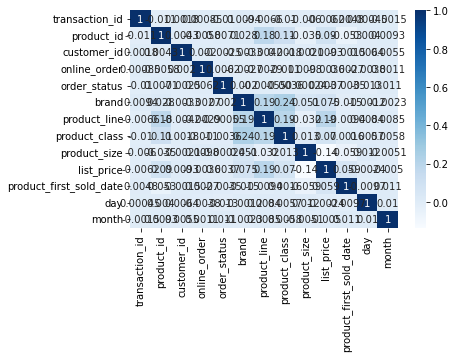

In [56]:
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

<AxesSubplot:>

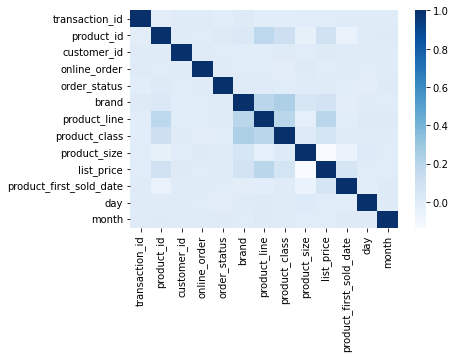

In [57]:
corr = df.corr()
sns.heatmap(corr, cmap="Blues")

In [58]:
cost = df['standard_cost']

In [64]:
# costs = []

# for i in cost:
#     if (i[0] == '$'):
#         costs.append(i[1:])
#     else:
#         costs.append(i)